In [1]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import yfinance as yf

%matplotlib inline

In [2]:
#Use one new Python library that hasn't been covered in class. (Yfinance is yahoo finance)
import yfinance as yf

In [3]:
# Load .env enviroment variables
load_dotenv()

True

#Choosing the 4 stocks to base the analysis on 

TSLA : Tesla was the first stock adopted by the larger community on social media for the correlation it had with the reddit community, although it does not qualify as a meme stock, it was one of the first stocks that got adopted into the mainstream by the larger community

GME : Gamestop is the stock that started the  actual frenzy and during COVID 2 short squeezes happened that pushed the prices to unprecedented levels

AMC: AMC Entertainment Holdings Inc. Smilar to Gamestop but it happened later and with a softer effect on the company and in theh long term, although as per some opinions, the speculation frenzy that caught AMC was one of the maor factors the company, a comany that offers live Cinema services mainly, a sector axed by covid, managed to survive while other companies did not

BB : Blackberry, compared to the other companies that had added value on the market, 

In [4]:
tesla = yf.Ticker("TSLA")
gamestop = yf.Ticker("GME")
amc = yf.Ticker("AMC")
blackberry = yf.Ticker("BB")
btc= yf.Ticker("BTC-USD")

meme_stocks = "TSLA GME AMC BB"

In [5]:
##Pulling the postcovid data for the 4 stocks

In [6]:
tesla_historical_precovid = tesla.history(start="2018-03-01", end="2020-03-01")
tesla_historical_precovid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-01,69.001999,69.734001,66.014000,66.185997,34428000,0,0
2018-03-02,65.396004,67.043999,64.594002,67.024002,25464000,0,0
2018-03-05,66.477997,67.550003,65.858002,66.669998,19119000,0,0
2018-03-06,66.750000,67.274002,65.405998,65.639999,21428500,0,0
2018-03-07,65.087997,66.500000,64.348000,66.459999,25036500,0,0


In [7]:
tesla_historical_precovid.drop(tesla_historical_precovid.columns.difference(['Close']), 1, inplace=True) ###Columns Difference is sweet Benjamin!!
tesla_historical_precovid.head()

C:\Users\Is\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Close
Date,
2018-03-01,66.185997
2018-03-02,67.024002
2018-03-05,66.669998
2018-03-06,65.639999
2018-03-07,66.459999


In [8]:
gamestop_historical_precovid = gamestop.history(start="2018-03-01", end="2020-03-01")
gamestop_historical_precovid.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-24,3.90,3.93,3.70,3.70,3566300,0.0,0
2020-02-25,3.77,3.79,3.55,3.56,4447900,0.0,0
2020-02-26,3.58,3.62,3.36,3.39,4724800,0.0,0
2020-02-27,3.23,3.63,3.18,3.47,3879500,0.0,0
2020-02-28,3.34,3.72,3.34,3.60,4692200,0.0,0


In [9]:
gamestop_historical_precovid.drop(gamestop_historical_precovid.columns.difference(['Close']), 1, inplace=True) ###Columns Difference is sweet Benjamin!!
gamestop_historical_precovid.head()

C:\Users\Is\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Close
Date,
2018-03-01,13.953071
2018-03-02,14.257373
2018-03-05,14.364772
2018-03-06,14.373721
2018-03-07,14.266321


In [10]:
amc_historical_precovid = amc.history(start="2018-03-01", end="2020-03-01")
amc_historical_precovid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-01,12.997337,13.038081,11.815761,12.019481,3739400,0.0,0
2018-03-02,11.978736,12.915848,11.815760,12.834360,3269800,0.0,0
2018-03-05,12.875104,13.038080,12.671384,12.834360,2160400,0.0,0
2018-03-06,12.875105,13.103271,12.467665,12.997336,1711700,0.0,0
2018-03-07,12.956594,13.021784,12.426922,12.793618,1385500,0.0,0


In [11]:
amc_historical_precovid.drop(amc_historical_precovid.columns.difference(['Close']), 1, inplace=True) ###Columns Difference is sweet Benjamin!!
amc_historical_precovid.head()

C:\Users\Is\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Close
Date,
2018-03-01,12.019481
2018-03-02,12.834360
2018-03-05,12.834360
2018-03-06,12.997336
2018-03-07,12.793618


In [12]:
blackberry_historical_precovid = blackberry.history(start="2018-03-01", end="2020-10-01")
blackberry_historical_precovid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-01,12.15,12.29,11.93,12.11,3975900,0,0
2018-03-02,11.92,12.39,11.76,12.36,3909600,0,0
2018-03-05,12.24,12.45,12.20,12.39,3350700,0,0
2018-03-06,12.52,12.56,12.33,12.44,3549800,0,0
2018-03-07,12.30,12.50,12.25,12.50,2918400,0,0


In [13]:
blackberry_historical_precovid.drop(blackberry_historical_precovid.columns.difference(['Close']), 1, inplace=True) ###Columns Difference is sweet Benjamin!!
blackberry_historical_precovid.head()

C:\Users\Is\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Close
Date,
2018-03-01,12.11
2018-03-02,12.36
2018-03-05,12.39
2018-03-06,12.44
2018-03-07,12.50


In [14]:
##Pulling the postcovid data for the 4 stocks####################################
###############################################################################
########################################################################

In [15]:
tesla_historical_postcovid = tesla.history(start="2020-03-03", end="2021-06-30")
tesla_historical_postcovid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-03,161.000000,161.395996,143.222000,149.102005,128920000,0,0.0
2020-03-04,152.792007,153.304001,144.945999,149.899994,75245000,0,0.0
2020-03-05,144.753998,149.149994,143.613998,144.908005,54263500,0,0.0
2020-03-06,138.000000,141.399994,136.854004,140.695999,63314500,0,0.0
2020-03-09,121.078003,132.600006,121.000000,121.599998,85368500,0,0.0


In [16]:
tesla_historical_postcovid.drop(tesla_historical_postcovid.columns.difference(['Close']), 1, inplace=True) ###Columns Difference is sweet Benjamin!!
tesla_historical_postcovid.head()

C:\Users\Is\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Close
Date,
2020-03-03,149.102005
2020-03-04,149.899994
2020-03-05,144.908005
2020-03-06,140.695999
2020-03-09,121.599998


In [17]:
gamestop_historical_postcovid = gamestop.history(start="2020-03-03", end="2021-06-30")
gamestop_historical_postcovid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-03,3.88,3.89,3.50,3.63,4282500,0,0
2020-03-04,3.71,3.83,3.46,3.77,4257600,0,0
2020-03-05,3.70,3.99,3.59,3.96,3599400,0,0
2020-03-06,3.84,4.07,3.76,3.92,2096800,0,0
2020-03-09,3.59,3.97,3.50,3.70,2732000,0,0


In [18]:
gamestop_historical_postcovid.drop(gamestop_historical_postcovid.columns.difference(['Close']), 1, inplace=True) ###Columns Difference is sweet Benjamin!!
gamestop_historical_postcovid.head()

C:\Users\Is\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Close
Date,
2020-03-03,3.63
2020-03-04,3.77
2020-03-05,3.96
2020-03-06,3.92
2020-03-09,3.70


In [19]:
amc_historical_postcovid = amc.history(start="2020-03-03", end="2021-06-30")
amc_historical_postcovid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-03,6.062805,6.092622,5.605610,5.774573,3843000,0.00,0
2020-03-04,5.824269,5.864025,5.396890,5.784513,4483700,0.00,0
2020-03-05,5.565853,5.575793,4.721036,4.890000,5853100,0.00,0
2020-03-06,4.620000,4.730000,4.370000,4.530000,4599900,0.03,0
2020-03-09,3.950000,4.070000,3.680000,3.850000,3404000,0.00,0


In [20]:
amc_historical_postcovid.drop(amc_historical_postcovid.columns.difference(['Close']), 1, inplace=True) ###Columns Difference is sweet Benjamin!!
amc_historical_postcovid.head()

C:\Users\Is\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Close
Date,
2020-03-03,5.774573
2020-03-04,5.784513
2020-03-05,4.890000
2020-03-06,4.530000
2020-03-09,3.850000


In [21]:
blackberry_historical_postcovid = blackberry.history(start="2020-03-03", end="2021-06-30")
blackberry_historical_postcovid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-03,5.08,5.13,4.87,4.93,6645100,0,0
2020-03-04,5.04,5.04,4.74,4.92,8415700,0,0
2020-03-05,4.78,4.85,4.63,4.67,7690600,0,0
2020-03-06,4.53,4.56,4.33,4.44,10202200,0,0
2020-03-09,3.95,4.09,3.77,3.85,13139000,0,0


In [22]:
blackberry_historical_postcovid.drop(blackberry_historical_postcovid.columns.difference(['Close']), 1, inplace=True) ###Columns Difference is sweet Benjamin!!
blackberry_historical_postcovid.head()

C:\Users\Is\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Close
Date,
2020-03-03,4.93
2020-03-04,4.92
2020-03-05,4.67
2020-03-06,4.44
2020-03-09,3.85


In [23]:
# Joining stocks into a single dataframe, first for precovid data

tesla_historical_precovid = tesla_historical_precovid.rename(columns={'Close': 'Tesla'})
gamestop_historical_precovid = gamestop_historical_precovid.rename(columns={'Close': 'Gamestop'})
amc_historical_precovid = amc_historical_precovid.rename(columns={'Close': 'AMC'})
blackberry_historical_precovid = blackberry_historical_precovid.rename(columns={'Close': 'Blackberry'})


# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_stocks_precovid_df = pd.concat([tesla_historical_precovid, gamestop_historical_precovid, amc_historical_precovid,blackberry_historical_precovid], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_stocks_precovid_df.sort_index(inplace=True)

# Display a few rows
combined_stocks_precovid_df

,Tesla,Gamestop,AMC,Blackberry
Date,,,,
2018-03-01,66.185997,13.953071,12.019481,12.11
2018-03-02,67.024002,14.257373,12.834360,12.36
2018-03-05,66.669998,14.364772,12.834360,12.39
2018-03-06,65.639999,14.373721,12.997336,12.44
2018-03-07,66.459999,14.266321,12.793618,12.50
...,...,...,...,...
2020-02-24,166.757996,3.700000,7.007012,5.76
2020-02-25,159.981995,3.560000,6.510061,5.50
2020-02-26,155.759995,3.390000,5.893841,5.47


In [24]:
# Joining stocks into a single dataframe, second for postcovid data
# Use the concat function to combine the DataFrames by column and perform an inner join. 

tesla_historical_postcovid = tesla_historical_postcovid.rename(columns={'Close': 'Tesla'})
gamestop_historical_postcovid = gamestop_historical_postcovid.rename(columns={'Close': 'Gamestop'})
amc_historical_postcovid = amc_historical_postcovid.rename(columns={'Close': 'AMC'})
blackberry_historical_postcovid = blackberry_historical_postcovid.rename(columns={'Close': 'Blackberry'})


combined_stocks_postcovid_df = pd.concat([tesla_historical_postcovid, gamestop_historical_postcovid, amc_historical_postcovid,blackberry_historical_postcovid], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_stocks_postcovid_df.sort_index(inplace=True)

# Display a few rows
combined_stocks_postcovid_df.head()

,Tesla,Gamestop,AMC,Blackberry
Date,,,,
2020-03-03,149.102005,3.63,5.774573,4.93
2020-03-04,149.899994,3.77,5.784513,4.92
2020-03-05,144.908005,3.96,4.890000,4.67
2020-03-06,140.695999,3.92,4.530000,4.44
2020-03-09,121.599998,3.70,3.850000,3.85


In [25]:
daily_returns_precovid = combined_stocks_precovid_df.pct_change()
daily_returns_precovid

,Tesla,Gamestop,AMC,Blackberry
Date,,,,
2018-03-01,NaN,NaN,NaN,NaN
2018-03-02,0.012661,0.021809,0.067797,0.020644
2018-03-05,-0.005282,0.007533,0.000000,0.002427
2018-03-06,-0.015449,0.000623,0.012698,0.004035
2018-03-07,0.012492,-0.007472,-0.015674,0.004823
...,...,...,...,...
2020-02-24,-0.074595,-0.084158,-0.054960,-0.041597
2020-02-25,-0.040634,-0.037838,-0.070922,-0.045139
2020-02-26,-0.026390,-0.047753,-0.094657,-0.005455


<AxesSubplot:xlabel='Date'>

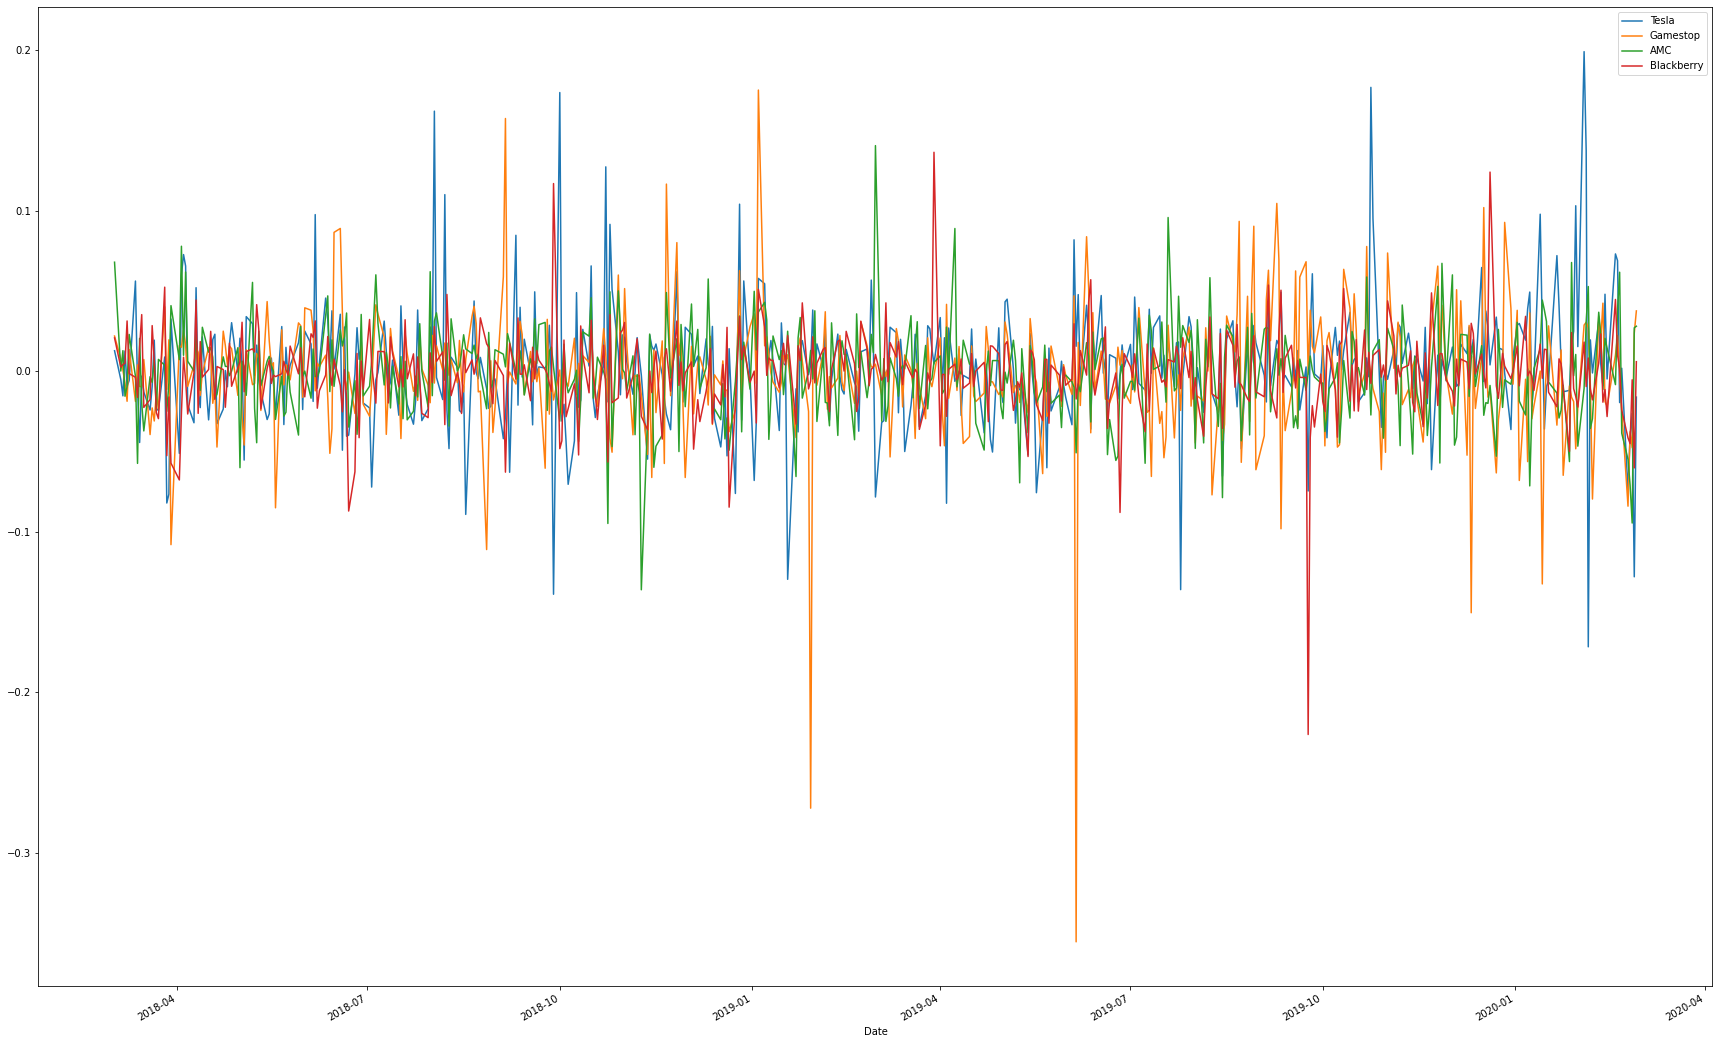

In [26]:
daily_returns_precovid.plot(figsize=(30,20))

In [27]:
daily_returns_postcovid = combined_stocks_postcovid_df.pct_change()
daily_returns_postcovid

,Tesla,Gamestop,AMC,Blackberry
Date,,,,
2020-03-03,NaN,NaN,NaN,NaN
2020-03-04,0.005352,0.038567,0.001721,-0.002028
2020-03-05,-0.033302,0.050398,-0.154639,-0.050813
2020-03-06,-0.029067,-0.010101,-0.073620,-0.049251
2020-03-09,-0.135725,-0.056122,-0.150110,-0.132883
...,...,...,...,...
2021-06-23,0.052685,-0.004809,0.000515,-0.020134
2021-06-24,0.035411,-0.032051,-0.027444,-0.035008
2021-06-25,-0.011694,-0.013188,-0.046561,-0.044164


<AxesSubplot:xlabel='Date'>

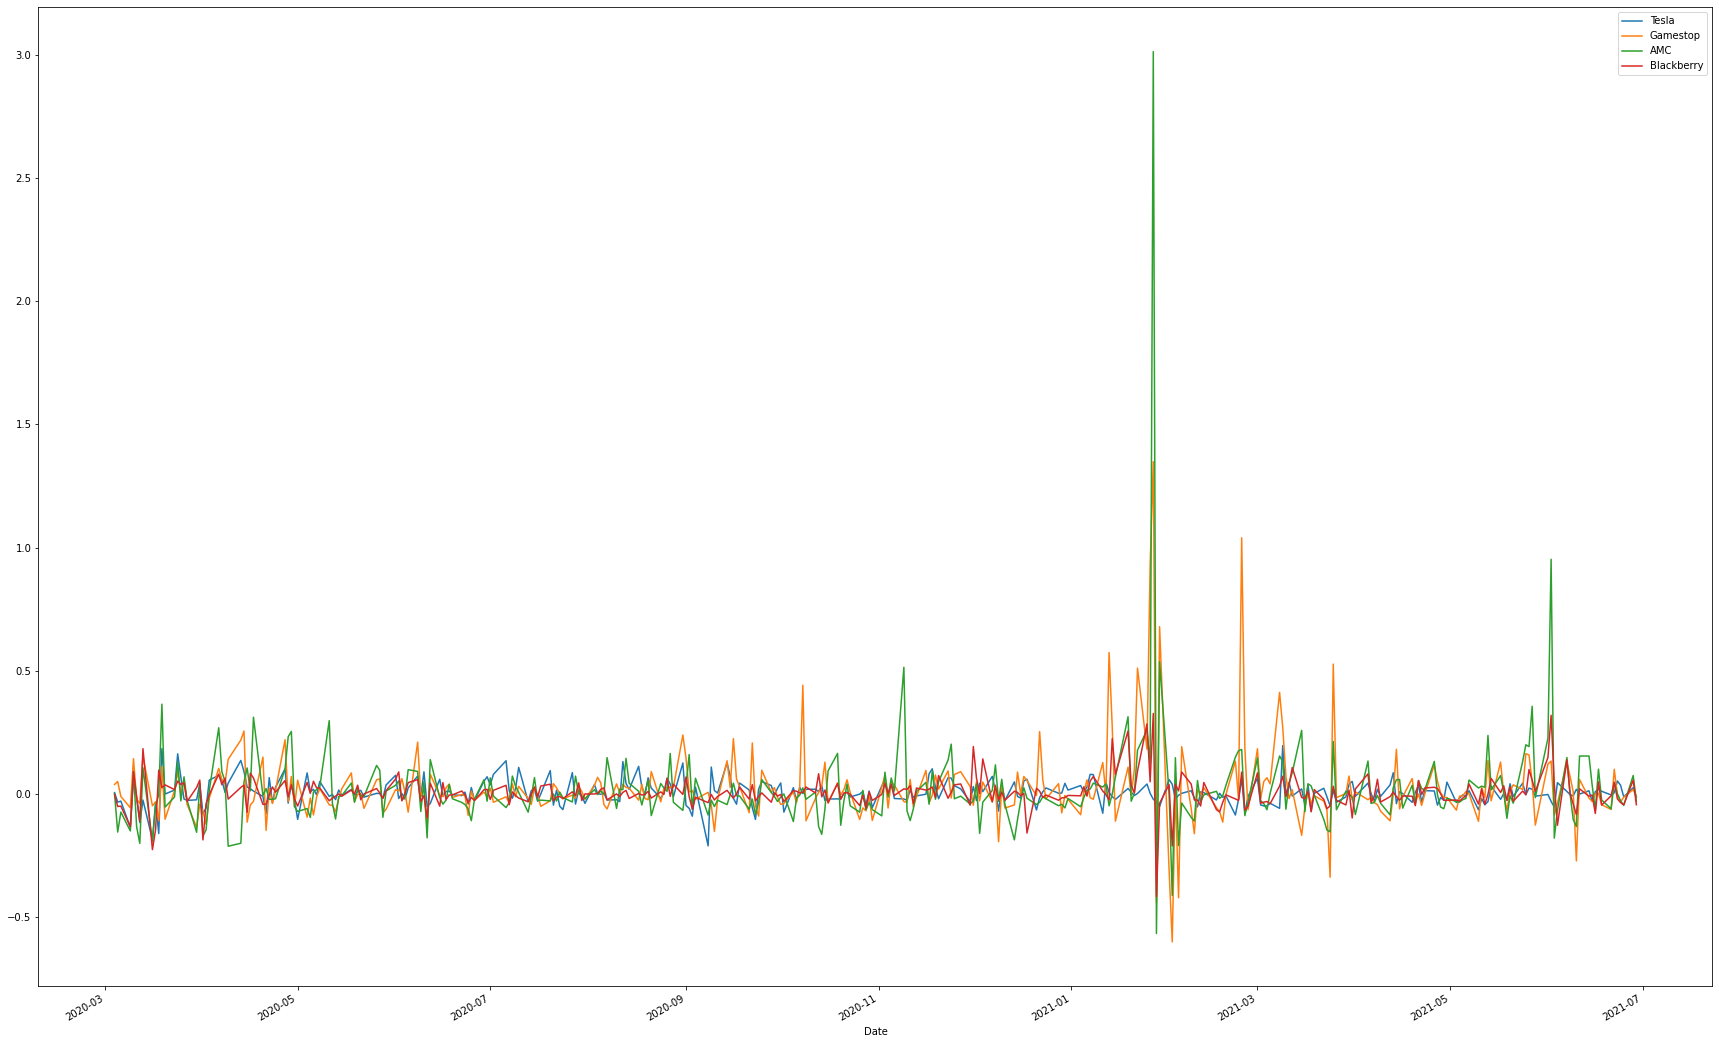

In [28]:
daily_returns_postcovid.plot(figsize=(30,20))

In [29]:
#We can notice the differenc and high volatility between the two periods.

In [34]:
cumulative_returns_precovid = (1 + daily_returns_precovid).cumprod()
cumulative_returns_precovid.head()

,Tesla,Gamestop,AMC,Blackberry
Date,,,,
2018-03-01,NaN,NaN,NaN,NaN
2018-03-02,1.012661,1.021809,1.067797,1.020644
2018-03-05,1.007313,1.029506,1.067797,1.023121
2018-03-06,0.991751,1.030148,1.081356,1.027250
2018-03-07,1.004140,1.022450,1.064407,1.032205


<AxesSubplot:xlabel='Date'>

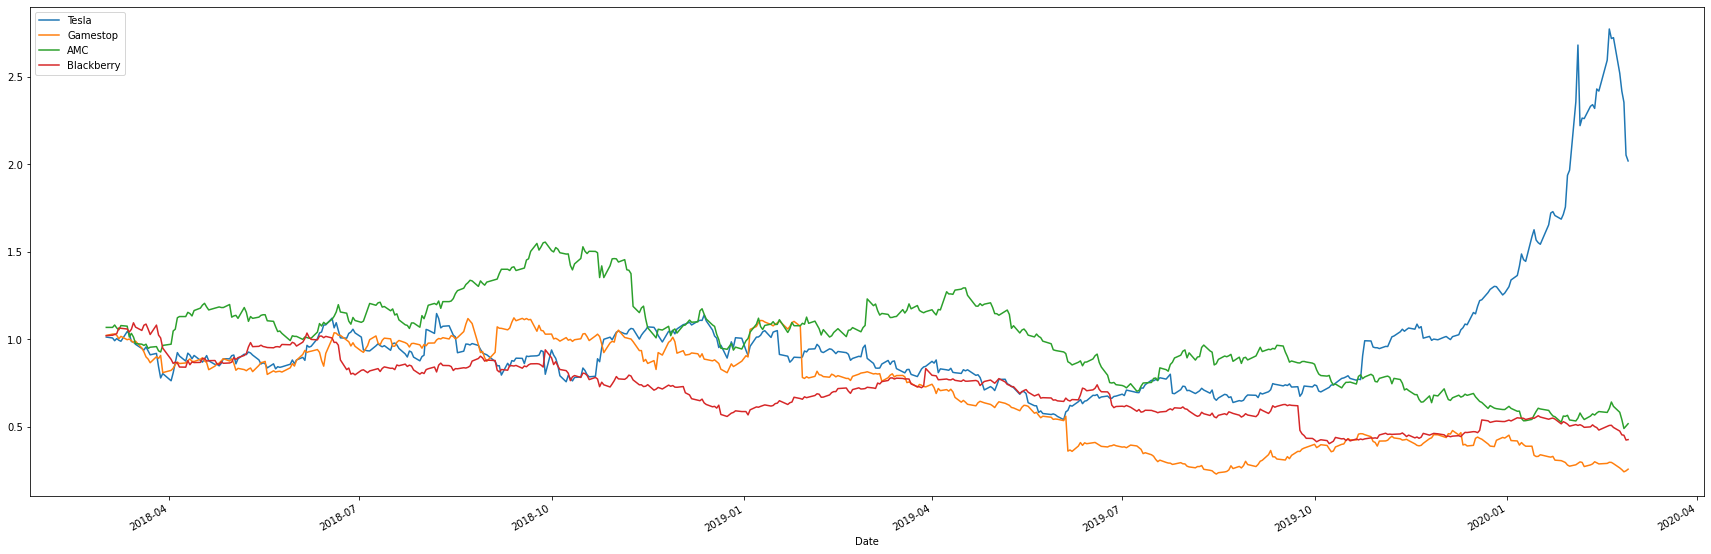

In [35]:
cumulative_returns_precovid .plot(figsize=(30,10))

In [32]:
cumulative_returns_postcovid = (1 + daily_returns_postcovid).cumprod()
cumulative_returns_postcovid.head()

,Tesla,Gamestop,AMC,Blackberry
Date,,,,
2020-03-03,NaN,NaN,NaN,NaN
2020-03-04,1.005352,1.038567,1.001721,0.997972
2020-03-05,0.971872,1.090909,0.846816,0.947262
2020-03-06,0.943622,1.079890,0.784474,0.900609
2020-03-09,0.815549,1.019284,0.666716,0.780933


<AxesSubplot:xlabel='Date'>

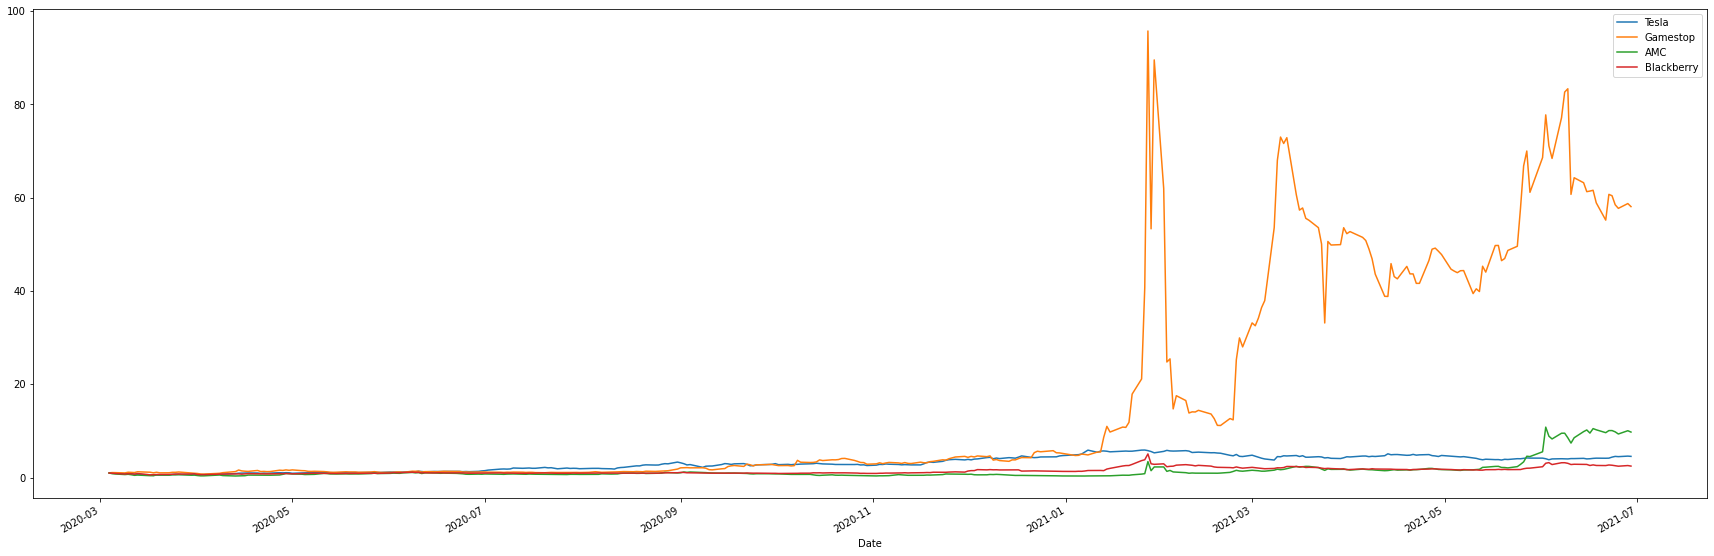

In [36]:
cumulative_returns_postcovid .plot(figsize=(30,10))